In [26]:
import pandas as pd
import os
from typing import Optional, Tuple, List, Dict, Union
from catboost import Pool, CatBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from src.data.loading import DataLoader
from src.features.feature_engineering import FeaturesMaker
from src.data.split import train_test_split_by_date
from src.model.catboost import CatBoostPredictor
from sklearn.linear_model import LinearRegression

In [27]:
dl = DataLoader()
store_sales = dl.load_store_sales('../data/store_sales.csv')
store_sales_dates = dl.load_dates('../data/store_sales_dates.csv')

In [28]:
fm = FeaturesMaker()
dataset = fm.make_features(store_sales, 'cnt', 61, 30, store_sales_dates)

In [29]:
dataset.head(3)

,store_id,item_id,cnt,cnt_lag_62,cnt_lag_63,cnt_lag_64,cnt_lag_65,cnt_lag_66,cnt_lag_67,cnt_lag_68,...,cnt_lag_88,cnt_lag_89,cnt_lag_90,cnt_lag_91,event_name,event_type,weekday,day,month,year
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,STORE_1,STORE_1_555,51,0,0,0,0,0,0,0,...,0,0,0,0,not_event,not_event,5,29,1,2011
2011-01-30,STORE_1,STORE_1_555,45,0,0,0,0,0,0,0,...,0,0,0,0,not_event,not_event,6,30,1,2011
2011-01-31,STORE_1,STORE_1_555,25,0,0,0,0,0,0,0,...,0,0,0,0,not_event,not_event,0,31,1,2011


In [30]:
train_df, test_df = train_test_split_by_date(dataset, 'date', '2015-11-22')

In [31]:
cb = CatBoostPredictor()
cb.fit(train_df, 'cnt')

Model for store STORE_1 item STORE_1_555 fitted.
Model for store STORE_2 item STORE_2_252 fitted.
Model for store STORE_3 item STORE_3_586 fitted.


In [32]:
preds = cb.predict(test_df)

In [33]:
preds

,store_id,item_id,date,cnt_predict
0,STORE_1,STORE_1_555,2015-11-22,22.113101
1,STORE_1,STORE_1_555,2015-11-23,18.563886
2,STORE_1,STORE_1_555,2015-11-24,17.478798
3,STORE_1,STORE_1_555,2015-11-25,20.323864
4,STORE_1,STORE_1_555,2015-11-26,18.585931
...,...,...,...,...
56,STORE_3,STORE_3_586,2016-01-17,88.414388
57,STORE_3,STORE_3_586,2016-01-18,63.524686
58,STORE_3,STORE_3_586,2016-01-19,58.941213
59,STORE_3,STORE_3_586,2016-01-20,58.498682


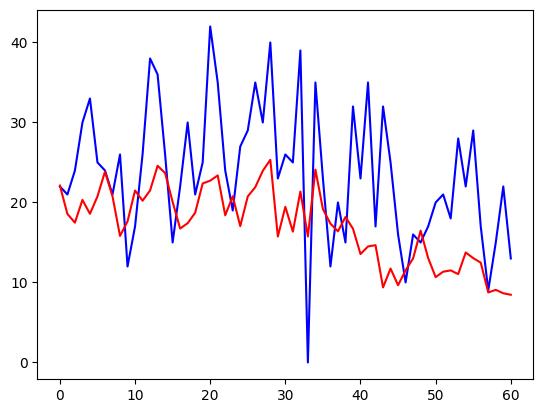

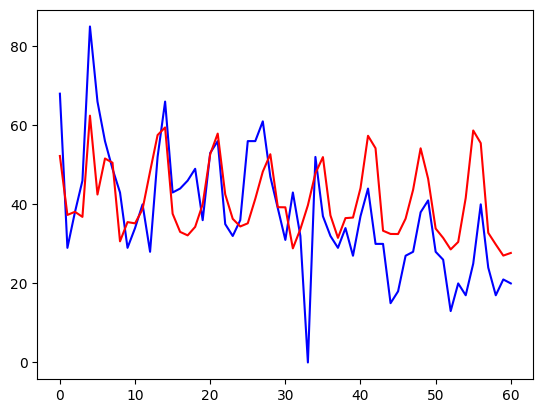

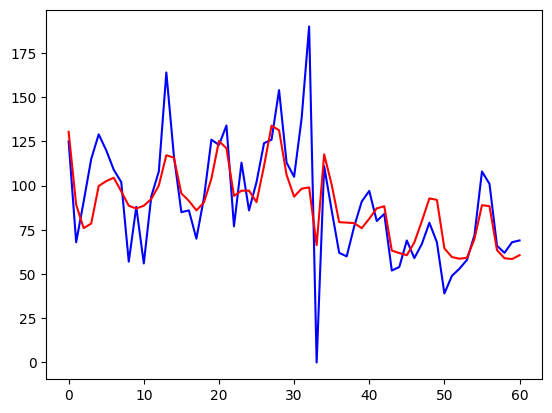

In [34]:
for store in preds['store_id'].unique():
    store_pred_df = preds[preds['store_id'] == store]
    store_test_df = test_df[test_df['store_id'] == store]

    plt.plot(store_test_df['cnt'].values, color='blue')
    plt.plot(store_pred_df['cnt_predict'].values, color='red')
    plt.show()

    

In [35]:
mean_absolute_error(test_df['cnt'].values, preds['cnt_predict'].values)

11.233877591599787